# ITBA 82.05 - Análisis Predictivo - Final exam - Thomas SIMON 

## Introduction

### About the project

This project is part of ITBA's 82.05 - Análisis Predictivo course for the 2023 academic year. It corresponds to the final exam of this course and aims to assess the ability to understand and analyze a dataset and to set up different models in order to best predict a given variable to be explained from this dataset. 

Our goal is to define a business case and develop a predictive model for it. We will use the dataset of the first exam about analysis of a diabetes health indicators. For this purpose, we follow the following steps : 
- Business case
- Data set
- Exploratory analysis
- Evaluation
- Reference model
- Model selection
- Final model description
- Limitations and possible improvements
- Conclusion

### Context

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.

## Business case

Let's assume that we are an insurance company. We need to determine whether or not it's profitable for us to insure patients, so we need to know the probability of them getting diabetes, based on the response variables. Our primary goal is to assess the profitability of providing insurance coverage to individuals based on their likelihood of having diabetes. The presence or absence of diabetes serves as the response variable. Here is our business model summary :

- Dataset : The dataset contains information on patients, including 21 explanatory variables that can be used to predict the likelihood of diabetes.

- Analysis : Utilize statistical and machine learning techniques to analyze the dataset and build a predictive model. The model aims to estimate the probability of an individual having diabetes based on the given explanatory variables.

- Risk assessment : Evaluate the model's predictions to determine the risk associated with insuring each individual. Higher probabilities of diabetes may be associated with higher risks for the insurer.

- Pricing strategy : Set insurance premiums based on the assessed risk. Individuals with a higher predicted probability of having diabetes may be charged higher premiums to compensate for the increased risk.

- Profitability analysis : Assess the overall profitability of providing insurance coverage by balancing the collected premiums against potential payouts. The goal is to ensure that the insurance business remains financially viable.

- Adjustment and optimization : Periodically review and update the predictive model and pricing strategy based on new data and industry trends. Continuous optimization is crucial to adapting to changes in risk profiles and maintaining a profitable insurance portfolio.

## Dataset

In this section, we will explain the choice and the content of our dataset. We start by importing the required packages for our work.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, confusion_matrix, 
    classification_report, make_scorer, ConfusionMatrixDisplay, 
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

In [7]:
data_2 = pd.read_csv('/Users/thomassim0n/Desktop/INSA SCIENCES-PO/Mobilité/Cours/Analysis Pred/Exam final/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data_3 = pd.read_csv('/Users/thomassim0n/Desktop/INSA SCIENCES-PO/Mobilité/Cours/Analysis Pred/Exam final/diabetes_binary_health_indicators_BRFSS2015.csv')

### Content 

The dataset is available on Kaggle. It was uploaded by Alex Teboul who cleaned and consolidated a dataset created from the BRFSS 2015 dataset already on Kaggle. It is available here :

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

- diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
- diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
- diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.


To simplify the models and the study, we won't work on the first dataset containing a response variable with values 0, 1 and 2. The choice must therefore be made between the balanced and unbalanced datasets.

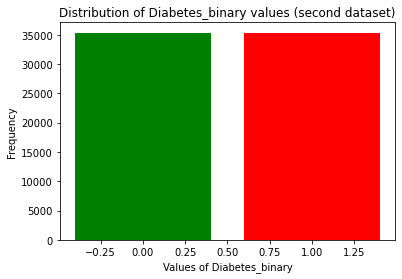

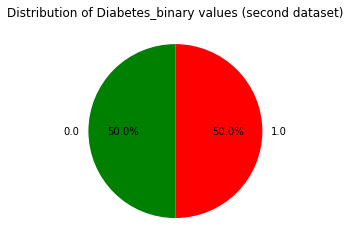

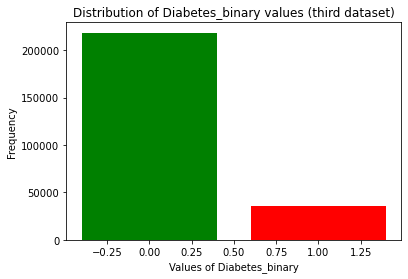

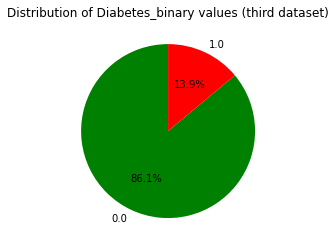

In [52]:
distribution2 = data_2['Diabetes_binary'].value_counts()

plt.bar(distribution2.index, distribution2.values, color=['green', 'red'])
plt.xlabel('Values of Diabetes_binary')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes_binary values (second dataset)')
plt.show()

plt.pie(distribution2, labels=distribution2.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of Diabetes_binary values (second dataset)')
plt.show()

distribution3 = data_3['Diabetes_binary'].value_counts()

plt.bar(distribution3.index, distribution3.values, color=['green', 'red'])
plt.xlabel('Values of Diabetes_binary')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes_binary values (third dataset)')
plt.show()

plt.pie(distribution3, labels=distribution3.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of Diabetes_binary values (third dataset)')
plt.show()

The advantages of the unbalanced dataset are as follows:

- Reflecting Reality : If our objective is to model a real-world situation where classes are not balanced, an unbalanced dataset may be more representative of reality.
- Time and resource savings : Collecting balanced data can be costly and time-consuming. Working with an unbalanced dataset can save time and resources.

On the other hand, models trained on unbalanced datasets can be biased towards the majority class, which can lead to poor performance on the minority class. Conversely, a balanced dataset often results in better modeling performance for the minority class, as the model is not biased by an abundance of examples from the majority class. Given that the dataset has already been cleaned up, and that our ultimate goal is to obtain high-performance models, we choose the second dataset, the balanced one.

In [9]:
data = data_2

## Exploratory analysis

First, we load and visualize the proposed data. For this purpose, the dataframe 'data' is created.

In [10]:
data.shape

(70692, 22)

In [11]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [13]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


So we learned that our dataset has 70692 individuals and 22 variables : Diabetes_binary and the 21 explanatory variables. 

We can now identify the quantitative and categorical variables.

In [14]:
# Identify potential categorical and quantitative variables by examining the number of unique values in each column
categorical_variables = []
for column in data.columns:
    if len(data[column].unique()) < 15:  # We use 15 to include the age
        categorical_variables.append(column)

print("Categorical Variables : ", categorical_variables)

quantitative_variable = data.drop(columns=categorical_variables)

print("Quantitative Variables : ", quantitative_variable.columns)

Categorical Variables :  ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Quantitative Variables :  Index(['BMI', 'MentHlth', 'PhysHlth'], dtype='object')


So we have three quantitative variables : 'BMI', 'MentHlth' and 'PhysHlth'. Let's vizualise their distribution.

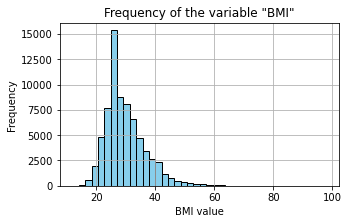

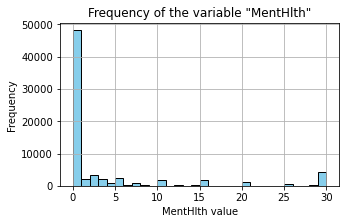

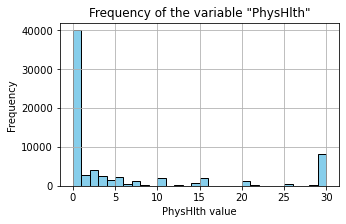

In [15]:
plt.figure(figsize=(5, 3))
plt.hist(data['BMI'], bins=40, color='skyblue', edgecolor='black')  
plt.title('Frequency of the variable "BMI"')
plt.xlabel('BMI value')
plt.ylabel('Frequency')
plt.grid(True)
plt.figure(figsize=(5, 3))
plt.hist(data['MentHlth'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frequency of the variable "MentHlth"')
plt.xlabel('MentHlth value')
plt.ylabel('Frequency')
plt.grid(True)
plt.figure(figsize=(5, 3))
plt.hist(data['PhysHlth'], bins=30, color='skyblue', edgecolor='black') 
plt.title('Frequency of the variable "PhysHlth"')
plt.xlabel('PhysHlth value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most individuals have extreme values of 'MentHlth' and 'PhysHlth'. These variables represent the physical illness or injury days in past 30 days ('PhysHlth') and its mental equivalent. We can already assume that the individuals with the value 30 will more likely have a diabete. We can verify it :

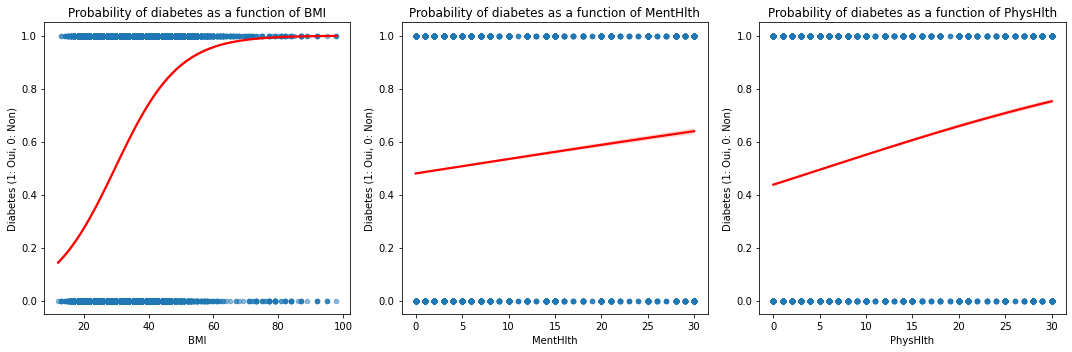

In [16]:
explanatory_variables = ['BMI', 'MentHlth', 'PhysHlth']
Diabete = 'Diabetes_binary'

fig, axes = plt.subplots(nrows=1, ncols=len(explanatory_variables), figsize=(15, 5))

# Logistic regressions
for i, var_exp in enumerate(explanatory_variables):
    sns.regplot(x=var_exp, y=Diabete, data=data, logistic=True, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_title(f'Probability of diabetes as a function of {var_exp}')
    axes[i].set_xlabel(var_exp)
    axes[i].set_ylabel('Diabetes (1: Oui, 0: Non)')

plt.tight_layout()
plt.show()




As we assumed, the probability of diabetes increase with the increase of the values of 'MentHlth' and 'PhysHlth'. In addition, the more your BMI is high, the more likely you have diabetes.

Furthermore, we know there is no NA, but we verify it empirically :

In [17]:
print(data.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


We can know display the correlations between the variables. We can assume some variables are correlated, like the General Health and the Physical Health.

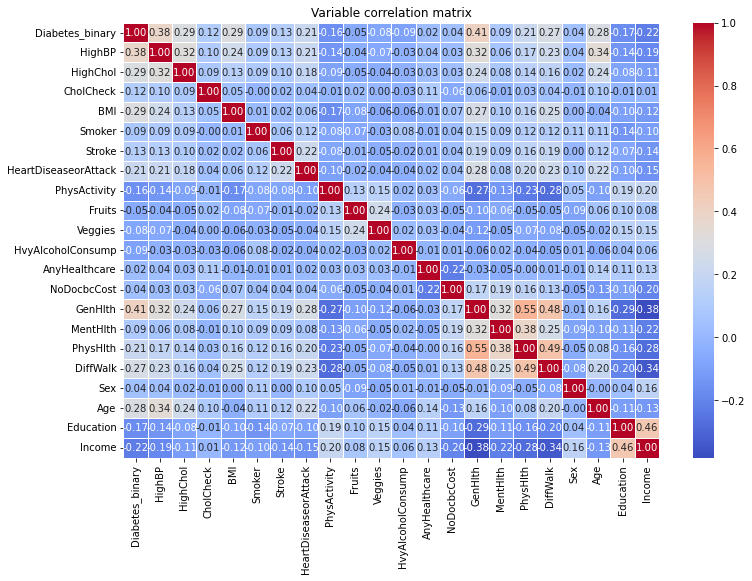

In [18]:
matrice_corr = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Variable correlation matrix")
plt.show()

Even if some variables are correlated, there is no correlation strong enough to etablish that a variable is replaceable. No significant correlation between the variables means no redundant variables. As a result every variables are important and we can keep all of them. We can add that some variables have more weight in the explanation of the variable to be explained : GenHlth, HighBP, HighChol, BMI, Age, DiffWalk.

At this point, we could decide that it would be a good idea to add a variable, for instance the individuals with a family member suffering from diabetes, but for our work these data will be enough.

## Evaluation (I)

In this section, we will describe our model evaluation measures and data partitioning features. Model evaluation is crucial to assess the performance of predictive models. Common evaluation metrics for classification problems like predicting diabetes include :

- Accuracy : it measures the overall correctness of the model's predictions.

$\begin{align*}
\text{Accuracy}=\frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
\end{align*}$

- Precision : it measures the accuracy of positive predictions.

$\begin{align*}
\text{Precision}=\frac{\text{True Positives}}{\text{True Positives + False Positives}}
\end{align*}$

- Recall (Sensitivity) : it measures the ability of the model to capture all the positive instances.

$\begin{align*}
\text{Recall}=\frac{\text{True Positives}}{\text{True Positives + False Negatives}}
\end{align*}$

- F1 Score : it combines precision and recall, providing a balance between the two.

$\begin{align*}
\text{F1 Score}=\frac{\text{2×Precision×Recall}}{\text{Precision+Recall}}
\end{align*}$

- Confusion Matrix : it provides a detailed breakdown of correct and incorrect predictions.

The evaluation of our model will be done when our model will be created. First, we will divide our dataset into training and testing sets to train and evaluate your model. Common split ratios are 70-30 or 80-20, where, for example, 70% of the data is used for training and 30% for testing.

In [19]:
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Reference model

Before jumping into complex models, it's often useful to establish a baseline with a simple model. For a classification problem like this, a logistic regression model can serve as a good reference. We train a logistic regression model on our training set and evaluate its performance on the testing set.

In [21]:
# Create and train the model
logreg_model = LogisticRegression(random_state=100)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.74
Precision: 0.73
Recall: 0.76
F1 Score: 0.75


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we have a balanced dataset, accuracy should be a sufficient indicator, although the other indicators are also of interest. Our accuracy here is 0.74 with logistic regression. It's not bad, but it's not really good either, and we can certainly do better. We'll use these 0.74 as a benchmark for evaluating our models in the future.

## Model selection

We will now explore more complex models to see if they outperform the reference logistic regression model. Some models to consider for classification tasks are:
- Random Forest
- Gradient Boosting (XGBoost)
- Support Vector Machines (SVM)

We will also use techniques like hyperparameter tuning to optimize the performance of our selected models. First, we'll use models with default hyperparameters, then we'll try to optimize these hyperparameters.

### Random Forest

In [119]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

Random Forest - Accuracy: 0.73
Random Forest - Precision: 0.72
Random Forest - Recall: 0.77
Random Forest - F1 Score: 0.74


With a "naive" test of our random forest model, we get barely better results than with the reference model. Let's see if optimizing the parameters allows us to obtain better metrics.

In [120]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=100)

# Perform grid search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(random_state=100, **best_params_rf)
best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")

Random Forest - Accuracy: 0.75
Random Forest - Precision: 0.73
Random Forest - Recall: 0.79
Random Forest - F1 Score: 0.76


In [122]:
if accuracy_rf > accuracy:
    print("The accuracy of the Random Forest is better than the one of the reference model")
if precision_rf > precision:
    print("The precision of the Random Forest is better than the one of the reference model")
if recall_rf > recall:
    print("The recall of the Random Forest is better than the one of the reference model")
if f1_rf > f1:
    print("The f1 of the Random Forest is better than the one of the reference model")

The accuracy of the Random Forest is better than the one of the reference model
The recall of the Random Forest is better than the one of the reference model
The f1 of the Random Forest is better than the one of the reference model


### Gradient Boosting

In [22]:
# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost - Precision: {precision_xgb:.2f}")
print(f"XGBoost - Recall: {recall_xgb:.2f}")
print(f"XGBoost - F1 Score: {f1_xgb:.2f}")

XGBoost - Accuracy: 0.74
XGBoost - Precision: 0.73
XGBoost - Recall: 0.78
XGBoost - F1 Score: 0.76


In [23]:
# Define the parameter grid
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the XGBoost model
xgb_model = XGBClassifier(random_state=100)

# Perform randomized search
random_search_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, scoring='f1', cv=5, n_iter=10)
random_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_

# Train the model with the best parameters
best_xgb_model = XGBClassifier(random_state=100, **best_params_xgb)
best_xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = best_xgb_model.predict(X_test)

In [24]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost - Precision: {precision_xgb:.2f}")
print(f"XGBoost - Recall: {recall_xgb:.2f}")
print(f"XGBoost - F1 Score: {f1_xgb:.2f}")

XGBoost - Accuracy: 0.75
XGBoost - Precision: 0.73
XGBoost - Recall: 0.79
XGBoost - F1 Score: 0.76


In [25]:
if accuracy_xgb > accuracy:
    print("The accuracy of the XGB is better than the one of the reference model")
if precision_xgb > precision:
    print("The precision of the XGB is better than the one of the reference model")
if recall_xgb > recall:
    print("The recall of the XGB is better than the one of the reference model")
if f1_xgb > f1:
    print("The f1 of the XGB is better than the one of the reference model")

The accuracy of the XGB is better than the one of the reference model
The precision of the XGB is better than the one of the reference model
The recall of the XGB is better than the one of the reference model
The f1 of the XGB is better than the one of the reference model


### Support Vector Machines

In [118]:
# Create and train the SVM model
svm_model = SVC(random_state=100)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.2f}")
print(f"SVM - Precision: {precision_svm:.2f}")
print(f"SVM - Recall: {recall_svm:.2f}")
print(f"SVM - F1 Score: {f1_svm:.2f}")

SVM - Accuracy: 0.74
SVM - Precision: 0.72
SVM - Recall: 0.80
SVM - F1 Score: 0.76


In [129]:
# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the SVM model
svm_model = SVC(random_state=100)

# Perform grid search
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, scoring='f1', cv=5)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_

# Train the model with the best parameters
best_svm_model = SVC(random_state=100, **best_params_svm)
best_svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.2f}")
print(f"SVM - Precision: {precision_svm:.2f}")
print(f"SVM - Recall: {recall_svm:.2f}")
print(f"SVM - F1 Score: {f1_svm:.2f}")

KeyboardInterrupt: 

In [ ]:
if accuracy_svm > accuracy:
    print("The accuracy of the SVM is better than the one of the reference model")
if precision_svm > precision:
    print("The precision of the SVM is better than the one of the reference model")
if recall_svm > recall:
    print("The recall of the SVM is better than the one of the reference model")
if f1_svm > f1:
    print("The f1 of the SVM is better than the one of the reference model")

For my computer, this code takes too long to run. I therefore rely on the first results of the "naive" SVM model.

## Evaluation (II)

In the context of an insurance company, high precision would mean that when the model predicts an individual has diabetes, there's a high likelihood that they actually do. Since this is our perspective, we'll define precision as our main parameter. In fact, precision is crucial when the cost of false positives (predicting diabetes when there is none) is high. Since the model that gives us the highest precision is the XGB model, that's the one we choose. We can evaluate our model by using tools as the ROC curve, the Precision-Recall Curve and the Confusion Matrix.

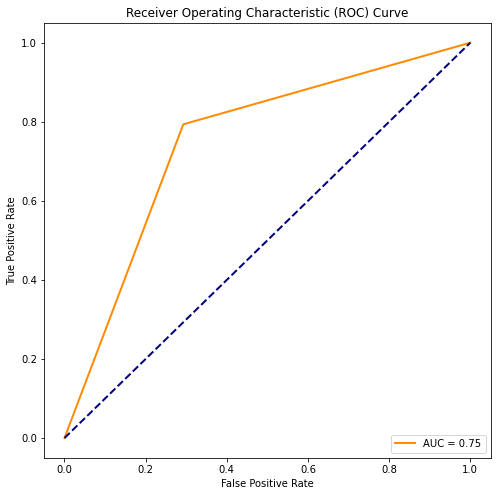

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We find that the Area Under the Curve (AUC) is equal to 0.75. This corresponds to an average accuracy, the worst being 0.5 and the best being 1. An increase in AUC indicates an improvement in discriminatory capabilities. 

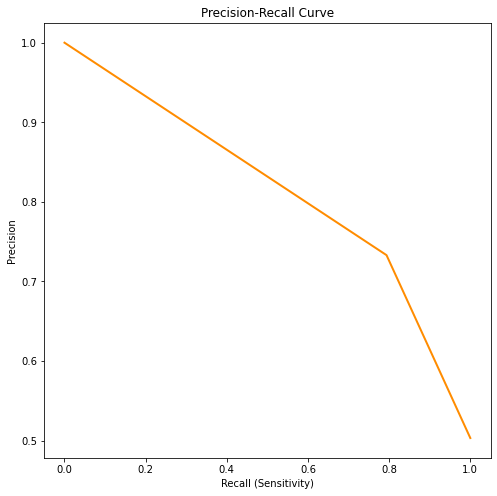

In [27]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

We can also represent the Precision-Recall Curve. This curve shows the trade-off between precision and recall for different probability thresholds. It is particularly useful when classes are unbalanced. In this case, it doesn't give us much additional information about our model.

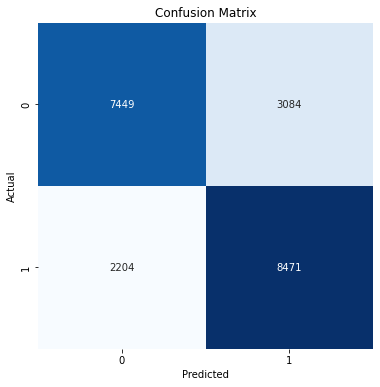

In [28]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

On the one hand, the confusion matrix reveals the various errors committed by a prediction algorithm, but more importantly, it also reveals the different types of error committed. By analyzing them, it is possible to determine the results that indicate how these errors occurred. By analyzing model errors, we see that there are more false positives (3064) than false negatives (2260). This is reassuring given our position as an insurer : although it would be preferable not to make any mistakes, the worst thing that can happen to us is not to be able to predict that an individual has diabetes when he or she actually do.

## Final model description

At this point, we can wonder what are the benefits of XGB. Here is a list which report these advantages for us (there are other ones but they are not useful in that work) :

- High Performance : XGBoost is known for its high performance and efficiency. It is optimized for speed and scalability, making it suitable for large datasets and computationally intensive tasks.
- Regularization : XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function. This helps prevent overfitting and improves the model's generalization ability.
- Parallel and Distributed Computing : XGBoost supports parallel and distributed computing, allowing it to take advantage of multiple CPU cores and distributed computing environments. This makes it well-suited for handling large datasets.
- Tree Pruning : XGBoost applies a technique called "pruning" during the tree-building process. Pruning helps reduce the complexity of trees, leading to more interpretable and efficient models.
- Feature Importance : XGBoost provides a feature importance score, allowing you to understand which features contribute the most to the model's predictions. This information is valuable for feature selection and understanding the model's behavior.
- Early Stopping : XGBoost supports early stopping, which allows you to stop the training process once the model's performance on a validation dataset stops improving. This helps prevent overfitting and saves computation time.

We can reliably estimate a model's ability to generalize to new, unseen data using cross-validation :

In [29]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=100,
    # Add other hyperparameters as needed
)

# Specify the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation and get F1 scores as an example metric
cross_val_results = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='f1')

# Display the cross-validation results
print("Cross-Validation Results:")
print("F1 Scores:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

Cross-Validation Results:
F1 Scores: [0.75532123 0.75157141 0.75356335 0.76053302 0.75349019]
Mean F1 Score: 0.7548958406539257


We can also assess which explanatory variables carry the most weight in our final model. Here's a code that allows us to obtain these variables in the order of their weight in the model.

In [34]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=100)

xgb_model.fit(X_train, y_train)

importance_type = 'weight'  # 'weight', 'gain', ou 'cover'
feature_importances = xgb_model.get_booster().get_score(importance_type=importance_type)

sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

BMI: 995.0
Age: 661.0
PhysHlth: 528.0
Income: 490.0
MentHlth: 488.0
GenHlth: 358.0
Education: 298.0
Sex: 157.0
HighChol: 147.0
Fruits: 137.0
Smoker: 134.0
PhysActivity: 125.0
Veggies: 120.0
HighBP: 116.0
NoDocbcCost: 100.0
DiffWalk: 99.0
HeartDiseaseorAttack: 91.0
AnyHealthcare: 80.0
Stroke: 74.0
HvyAlcoholConsump: 53.0
CholCheck: 44.0


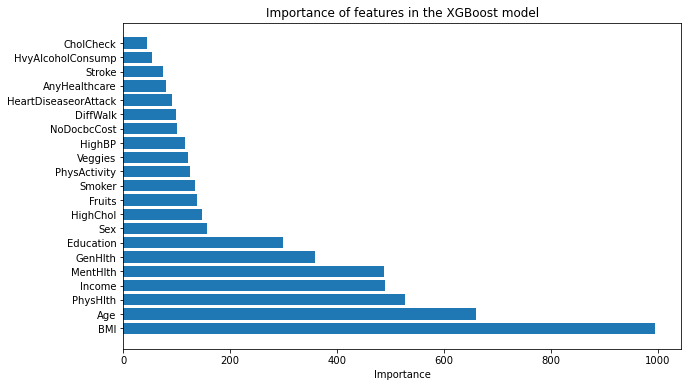

In [35]:
features, importances = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Importance of features in the XGBoost model')
plt.show()

We can see that some variables are somewhat unexpected in the variables with the most weight like education or income.

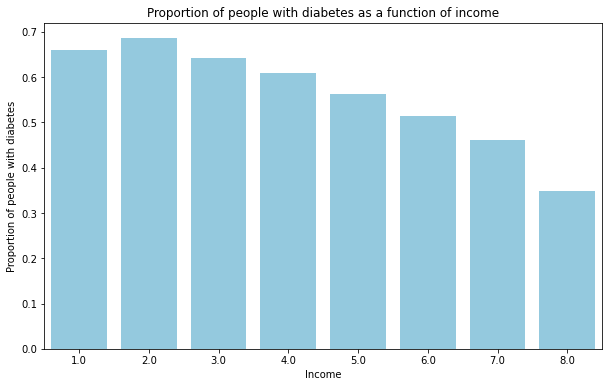

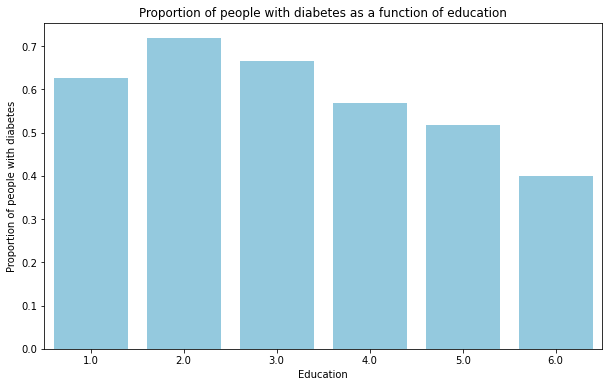

In [49]:
data_combined = pd.concat([X, y], axis=1)

proportion_diabetes = data_combined.groupby('Income')['Diabetes_binary'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=proportion_diabetes.index, y=proportion_diabetes.values, color='skyblue')
plt.xlabel('Income')
plt.ylabel('Proportion of people with diabetes')
plt.title('Proportion of people with diabetes as a function of income')
plt.show()

proportion_diabetes = data_combined.groupby('Education')['Diabetes_binary'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=proportion_diabetes.index, y=proportion_diabetes.values, color='skyblue')
plt.xlabel('Education')
plt.ylabel('Proportion of people with diabetes')
plt.title("Proportion of people with diabetes as a function of education")
plt.show()

## Limitations and possible improvements

### Limitations

Here are the main limitations of the XGBoost model in general, and what we need to consider when applying this model to our insurance company: 

- Due to its complexity, XGBoost can be difficult to interpret. Understanding how each feature contributes to predictions can be a challenge. Here we have managed to obtain a relatively reliable model in which we know the most weighted variables, but care must be taken when using this model on a different dataset.
- Although XGBoost is efficient, training a model with many trees can be time-consuming, especially on massive datasets.
- XGBoost generally performs well with large datasets. For smaller datasets, other simpler models may be more appropriate. Here, this is not a problem, as our datasets are large enough.
- The major problem with the XGBoost model is its potential lack of stability. XGBoost results can vary according to the training data. This means that the model can give different results for similar data sets.
- Finally, XGBoost can require a significant amount of memory, particularly for large datasets or when using many trees.

### Possible improvements

With more time or ressources, we could have used the other datasets available on Kaggle to compare the results of this model with other ones, which would have been created based on the non-balanced datasets.

Moreover, here is a non-exhaustive list of steps to follow after creating this model :

- External validation : If possible, we should validate the model's performance on an external dataset or in a simulated production environment to assess its ability to generalize to new data.

- Deployment : If we are a real insurance company, we need to get our model prepared for deployment. Indeed, we have to make sure the model is well documented, encapsulated in a usable API or format, and ready to be integrated into existing applications or workflows.

- Continuous monitoring : Then we will set up continuous monitoring mechanisms to track model performance in a production environment. This can include monitoring performance degradations, changes in data distribution...

- Training and documentation : We should also train end-users and clearly document the model, its inputs, outputs and any associated important information. This ensures correct and informed use of the model.

- Periodic re-evaluation: Finally we have to plan periodic re-evaluations of the model as new data becomes available. In fact, models can become obsolete over time due to changes in data trends and behaviors.

## Conclusion

In summary, here's what we were able to achieve in this problem:

- Background : Our objective is to help the insurance company assess the risk of diabetes in potential policyholders. Early identification of at-risk individuals will enable the insurance company to better adjust premiums and offer health management services.




- Objective : We aim to predict whether an individual is potentially affected by diabetes using medical and demographic data. This is crucial for estimating the risk of diabetes-related claims and for making informed underwriting and risk management decisions.




- Model type : We used an XGBoost model, a powerful machine learning algorithm, because of its ability to handle complex datasets and deliver good prediction performance.




- Important features : Feature importance analysis identified factors such as body mass index (BMI), age and other medical indicators as particularly important in model decision-making.




- Performance : Our model has an precision of 0.73% and an F1 score of 0.76%. These metrics demonstrate the model's ability to accurately identify individuals at risk of diabetes.




- Model interpretation : Although XGBoost is a complex model, we can interpret certain decisions by focusing on the importance of features. For example, the model pays particular attention to BMI and age when predicting diabetes risk.




- Visualizations : We have created visualizations showing the relative importance of features. Graphs can also illustrate how the model performs on different subsets of data, or show specific examples of predictions.




- Risks and limitations : It is important to highlight the limitations of the model, including its dependence on the quality of the training data and its potentially poorer performance in scenarios not represented in the training data.




- Next steps : We may consider improving the model by exploring new relevant variables or adjusting hyperparameters to further optimize performance.